In [1]:
import numpy as np
import pandas as pd
import math

In [51]:
# X xor Y and X

x_train = ([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

y_train = np.array([
    0, 1, 0, 1
])

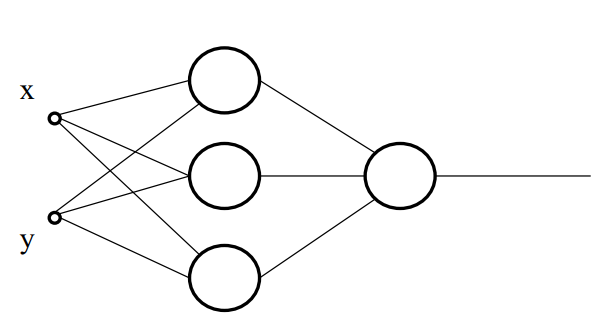

In [52]:
from random import random as rnd
from random import uniform as uniform

In [53]:
def act(x):
  return 1 / (1 + math.pow(math.e, -x))

def deriv(x):
  return act(x) * (1 - act(x))

In [54]:
def predict(weights, signals, act):
  signals_layers = []

  for i in range(len(weights[0])):
    signals_layers.append(act(np.dot(weights[0][i], signals)))

  signals_layers.append(1)

  s = np.dot(weights[1][0], signals_layers)

  return (act(s), signals_layers, s)

In [55]:
def fit(weights, x_train, y_train, act, min_error, epochs, train_speed):
  for epoch in range(epochs):

    errs = 0

    print(f'epochs {epoch + 1} has started', end=', ')

    for i in range(len(x_train)):
      
      pr = predict(weights, x_train[i], act)
      y_pr = pr[0]
      signals_hidden = pr[1]
      net_k = pr[2]

      err = y_train[i] - y_pr
      errs += err ** 2

      sigma_o = train_speed * err * deriv(net_k)

      for j in range(len(weights[1][0])):
        weights[1][0][j] += sigma_o * signals_hidden[j]

      for j in range(len(weights[0])):

        net_j = np.dot(weights[0][j], x_train[i])
        der = train_speed * deriv(net_j)

        for k in range(len(weights[0][j])):
          weights[0][j][k] += der * x_train[i][k] * sigma_o * weights[1][0][j]

    errs = errs ** 0.5
    print(f'squared error = {errs}, weights = {weights}')

    if (errs <= min_error):
      print('fitting is done')
      break

  return weights

In [56]:
def get_weights_copy(weights):
  w = []
  for l in range(len(weights)):
    w.append([])
    for n in range(len(weights[l])):
      w[l].append([])
      for s in range(len(weights[l][n])):
        w[l][n].append(weights[l][n][s])

  return w

def out_weights(w):
  print()
  for i in range(len(w)):
    print(f'layer {i + 1}')
    for j in range(len(w[i])):
      print(f'neuron {j + 1}: {w[i][j]}')
  print()

In [57]:
weights = [
    [
        [rnd(), rnd(), rnd()],
        [rnd(), rnd(), rnd()],
        [rnd(), rnd(), rnd()]
    ],
    [
        [rnd(), rnd(), rnd(), rnd()],
    ]
]

In [58]:
w1 = weights
w2 = get_weights_copy(w1)

In [59]:
w1 = fit(w1, x_train, y_train, act, 0.1, 10000, 1)

out_weights(w1)

epochs 1 has started, squared error = 1.1456811161697806, weights = [[[0.4003618876259645, 0.8801231913746458, 0.11267970832732903], [0.10286557525894324, 0.3884883605372232, 0.41983543787968547], [0.5039037695592612, 0.21107656518917298, 0.643879772788178]], [[0.8108805146150334, 0.1274531630014955, 0.529614713351975, -0.07494932078551829]]]
epochs 2 has started, squared error = 1.1039417807433336, weights = [[[0.42585230925897805, 0.8706318571816577, 0.09142852925982717], [0.10543997160362281, 0.3896999330622096, 0.4214269681994912], [0.5178301676168905, 0.20537754769456898, 0.6312573551722618]], [[0.7441811833951061, 0.048629239735828, 0.45907802098585937, -0.20279115552956115]]]
epochs 3 has started, squared error = 1.080096582254563, weights = [[[0.45536747672029043, 0.86390933349205, 0.07801348657520202], [0.10595541105833649, 0.3920567366729504, 0.4257784675161138], [0.5332888083975729, 0.20192778368771164, 0.6240846516310935]], [[0.7065829847610507, -0.0038869569591863107, 0.41

In [60]:
def predict_back_prop(weights, signals, act):
  fields = []
  signals_layers = []

  fields.append([])

  for k in signals:
    fields[0].append(k)

  fields.append([])
  signals_layers.append([])
  for j in range(len(weights[0])):
    f = np.dot(weights[0][j], fields[0])
    fields[1].append(f)
    signals_layers[0].append(act(f))

  if (len(weights) > 1):
    fields[1].append(1)
    signals_layers[0].append(1)

    for i in range(1, len(weights)):
      fields.append([])
      signals_layers.append([])
      for j in range(len(weights[i])):
        f = np.dot(weights[i][j], signals_layers[i - 1])
        fields[i + 1].append(f)
        signals_layers[i].append(act(f))
      if (i != len(weights) - 1):
        fields[i + 1].append(1)
        signals_layers[i].append(1)

  return signals_layers[len(signals_layers) - 1][0], fields

In [61]:
def back_prop(weights, x_train, y_train, act, deriv, max_sq_error, max_epochs, train_speed):
  G = []
  for i in range(len(weights)):
    G.append([])
    for j in range(len(weights[i])):
      G[i].append(0)

  epochs = 0
  errs = 0
  while(True):
    epochs += 1

    errs = 0
    for i_x in range(len(x_train)):
      predicted = predict_back_prop(weights, x_train[i_x], act)

      y_pr = predicted[0]
      fields = predicted[1]

      error = y_train[i_x] - y_pr
      errs += error ** 2

      L = len(weights) - 1

      g = deriv(fields[L + 1][0]) * error

      G[L][0] = g
      for i in range(len(weights[L][0])):
        weights[L][0][i] += train_speed * g * act(fields[L][i])

      for i in range(L - 1, -1, -1):
        for j in range(len(weights[i])):

          weighted_sum = 0
          for k in range(len(weights[i + 1])):
            weighted_sum += weights[i + 1][k][j] * G[i + 1][k]
                             
          g = deriv(fields[i + 1][j]) * weighted_sum
          G[i][j] = g         

          for k in range(len(weights[i][j])):
            weights[i][j][k] += train_speed * g * act(fields[i][k])

    errs = errs ** 0.5

    if (errs <= max_sq_error):
      print(f'epochs: {epochs}, squared error = {errs}\nfitting is done')
      break

    if (epochs == max_epochs):
      print(f'epoch limited. epochs: {epochs}, squared error = {errs}')
      break


  return weights

In [62]:
w2 = back_prop(w2, x_train, y_train, act, deriv, 0.1, 10000, 1)
out_weights(w2)

epochs: 506, squared error = 0.09995742474551735
fitting is done

layer 1
neuron 1: [2.755242541589405, 0.11813013570069868, -1.5451513389401597]
neuron 2: [0.19324744885341075, 1.2606861397314602, 1.6678577763778653]
neuron 3: [2.040858886144098, -0.4173030057118624, -0.9536097757458514]
layer 2
neuron 1: [6.697111641829597, -2.207931594431488, 4.430003897939658, -3.2493502474157396]



In [63]:
for r in x_train:
  print(predict(w2, r, act)[0])

0.06313026634578668
0.9648304821526036
0.041014981057287084
0.9458699585608219


In [64]:
def get_mse(weights, x_test, y_test, predict_func, act):
  y_pr = []
  for x in x_test:
    y_pr.append(predict_func(weights, x, act)[0])

  mse = np.square(y_pr - y_test).mean()

  return mse

In [65]:
mse_delta = get_mse(w1, x_train, y_train, predict, act)
mse_back_prop = get_mse(w2, x_train, y_train, predict_back_prop, act)

print(f'mse of generalized delta rule: {mse_delta}')
print(f'mse of back propagation algorithm: {mse_back_prop}')

mse of generalized delta rule: 0.0024636255446669544
mse of back propagation algorithm: 0.0024586538929612643
